# IMPORTS

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display  import HTML

## HELPER FUNCTIONS

In [79]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


/home/alex/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# LOADING DATA

In [80]:
data_raw = pd.read_csv('datasets/cr_loan2.csv')

In [81]:
data = data_raw.copy()

In [82]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [83]:
data.columns = ['idade', 'renda_pessoal', 'estado_casa', 'duracao_emprego', 'motivo_emprestimo',
                   'grau_do_emprestimo', 'valor_do_emprestimo', 'taxa_juros', 'status_emprestimo', 'loan_percent_income',
                   'cb_person_default_on_file', 'cb_person_cred_hist_length']

In [84]:
data.head()

,idade,renda_pessoal,estado_casa,duracao_emprego,motivo_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_juros,status_emprestimo,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# EDA (EXPLORY DATA ANALYSIS)

## RENDA PESSOAL vs TAXA_JUROS

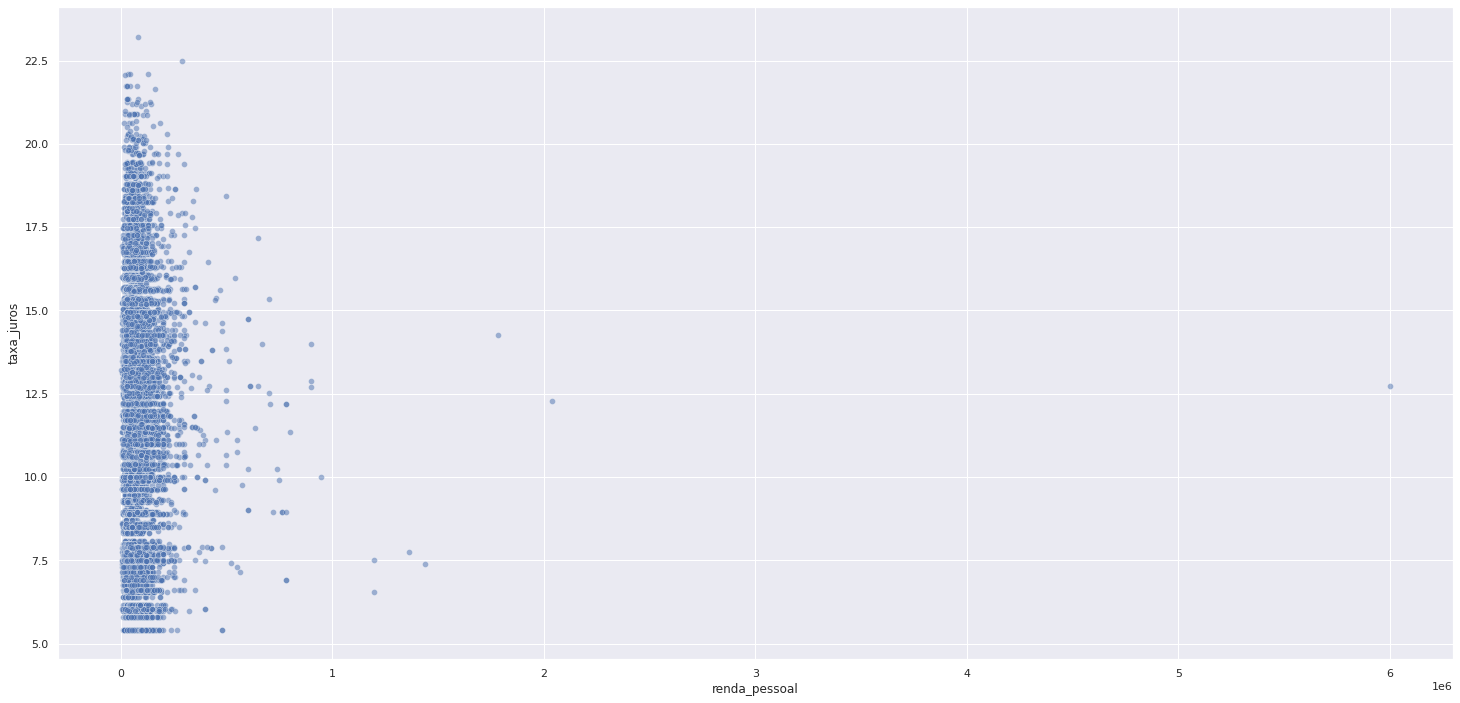

In [85]:
sns.scatterplot(x='renda_pessoal', y='taxa_juros', data=data, alpha=0.5);

## VALOR DO EMRPÉSTIMO

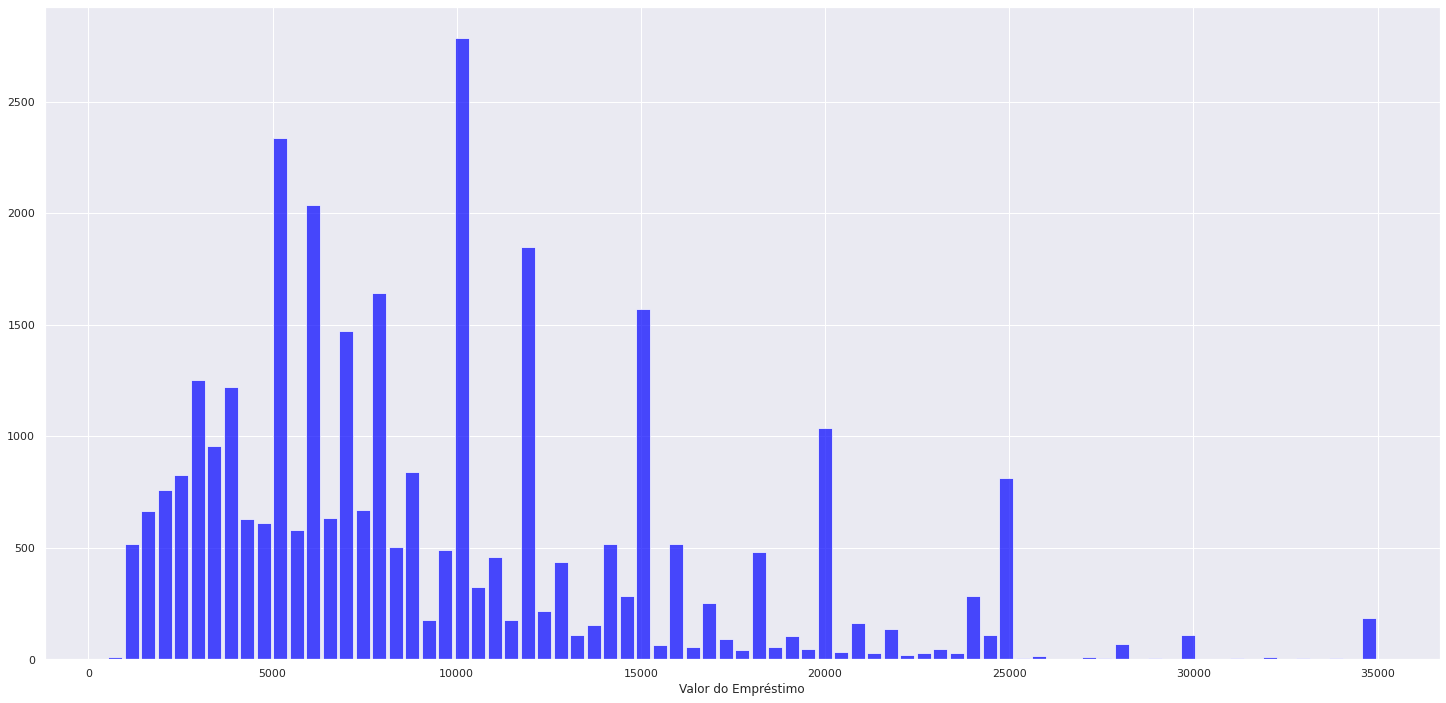

In [86]:
n, bins, patches = plt.hist(x=data['valor_do_emprestimo'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Valor do Empréstimo")
plt.show()

## RENDA PESSOAL  vs IDADE

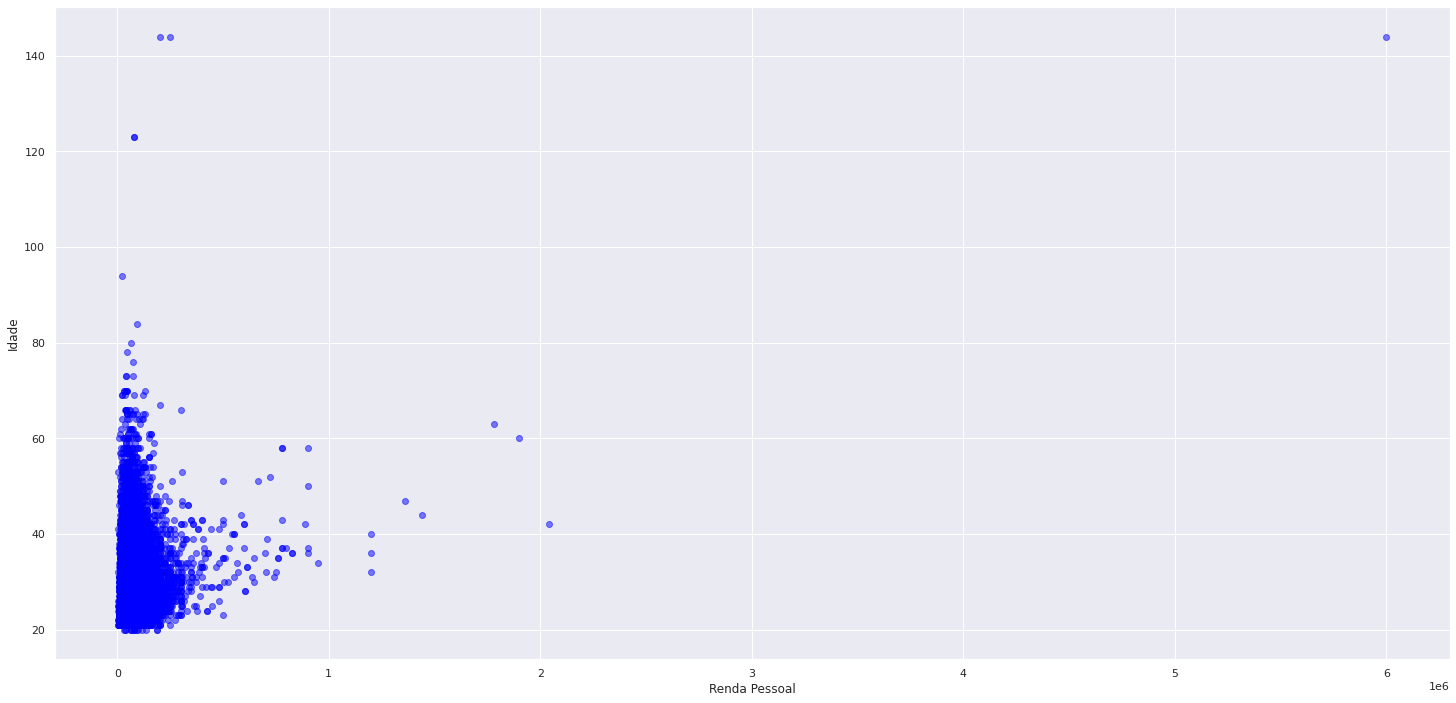

In [87]:
plt.scatter(data['renda_pessoal'], data['idade'],c='blue', alpha=0.5)
plt.xlabel('Renda Pessoal')
plt.ylabel('Idade')
plt.show()

## MOTIVO_EMPRESTIMO vs STATUS_EMPRESTIMO

In [88]:
pd.crosstab(data['motivo_emprestimo'], data['status_emprestimo'], margins = True)

status_emprestimo,0,1,All
motivo_emprestimo,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


## ESTADO_CASA vs STATUS_EMPRESTIMO - values: taxa_juros

In [89]:
pd.crosstab(data['estado_casa'], data['status_emprestimo'], values=data['taxa_juros'], aggfunc='mean').round(2)

status_emprestimo,0,1
estado_casa,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


## ESTADO_CASA vs STATUS_EMPRESTIMO vs GRAU_DO_EMPRESTIMO

In [90]:
pd.crosstab(data['estado_casa'],[data['status_emprestimo'],data['grau_do_emprestimo']])

status_emprestimo      0                                 1                              
grau_do_emprestimo     A     B     C    D    E   F  G    A     B    C     D    E   F   G
estado_casa                                                                             
MORTGAGE            5219  3729  1934  658  178  36  0  239   324  321   553  161  61  31
OTHER                 23    29    11    9    2   0  0    3     5    6    11    6   2   0
OWN                  860   770   464  264   26   7  0   66    34   31    18   31   8   5
RENT                3602  4222  2710  554  137  28  1  765  1338  981  1559  423  99  27

## ESTADO_CASA vs STATUS_EMPRESTIMO - values: loan_percent_income

In [91]:
pd.crosstab(data['estado_casa'], data['status_emprestimo'],
                  values=data['loan_percent_income'], aggfunc='mean')

status_emprestimo,0,1
estado_casa,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


## LOAN_PERCENT_INCOME vs STATUS_EMPRESTIMO

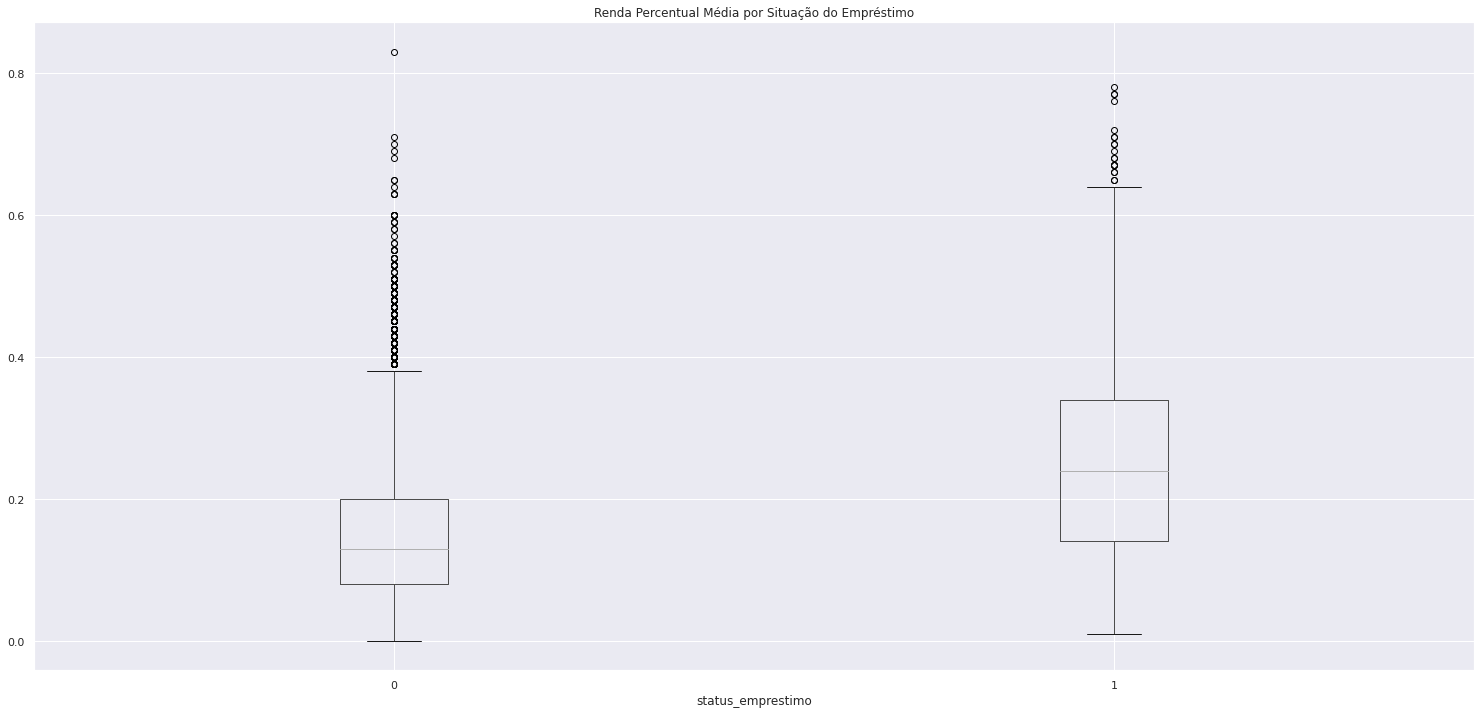

In [92]:
data.boxplot(column = ['loan_percent_income'], by = 'status_emprestimo')
plt.title('Renda Percentual Média por Situação do Empréstimo')
plt.suptitle('')
plt.show()

# OUTLIERS

## TAXA DE JUROS

In [93]:
pd.crosstab(data['estado_casa'], data['status_emprestimo'], values=data['taxa_juros'], aggfunc='mean').round(2)

status_emprestimo,0,1
estado_casa,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


## DURACAO_EMPREGO

/home/alex/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duracao_emprego', ylabel='taxa_juros'>

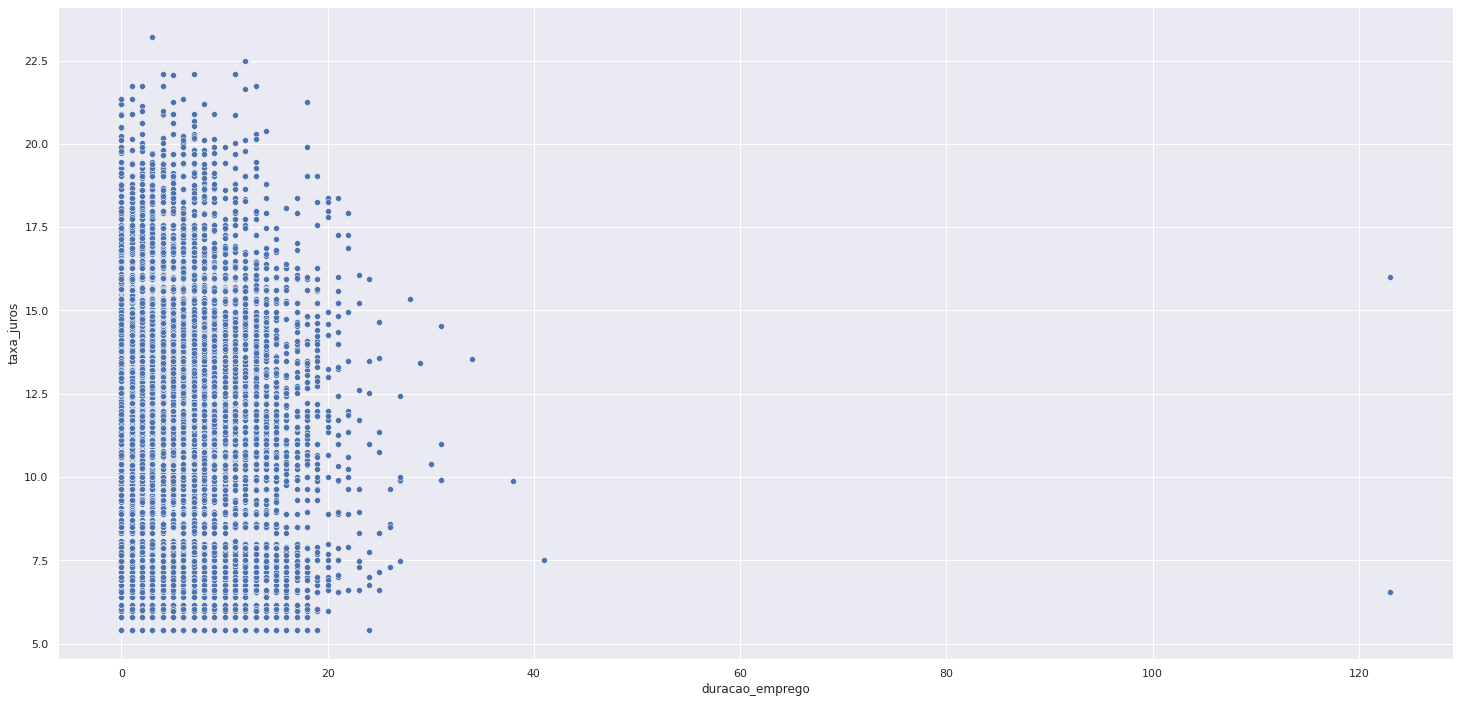

In [94]:
sns.scatterplot(data['duracao_emprego'], data['taxa_juros'], data=data)

In [95]:
pd.crosstab(data['status_emprestimo'],data['estado_casa'],
        values=data['duracao_emprego'], aggfunc='max')

estado_casa,MORTGAGE,OTHER,OWN,RENT
status_emprestimo,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


In [96]:
#REMOVENDO OUTLIERS

indices = data[data['duracao_emprego'] >= 60].index
data.drop(indices, inplace=True)

In [97]:
pd.crosstab(data['status_emprestimo'],data['estado_casa'],
        values=data['duracao_emprego'], aggfunc=['min','max'])

min                      max                  
estado_casa       MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
status_emprestimo                                                    
0                      0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                      0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

## IDADE

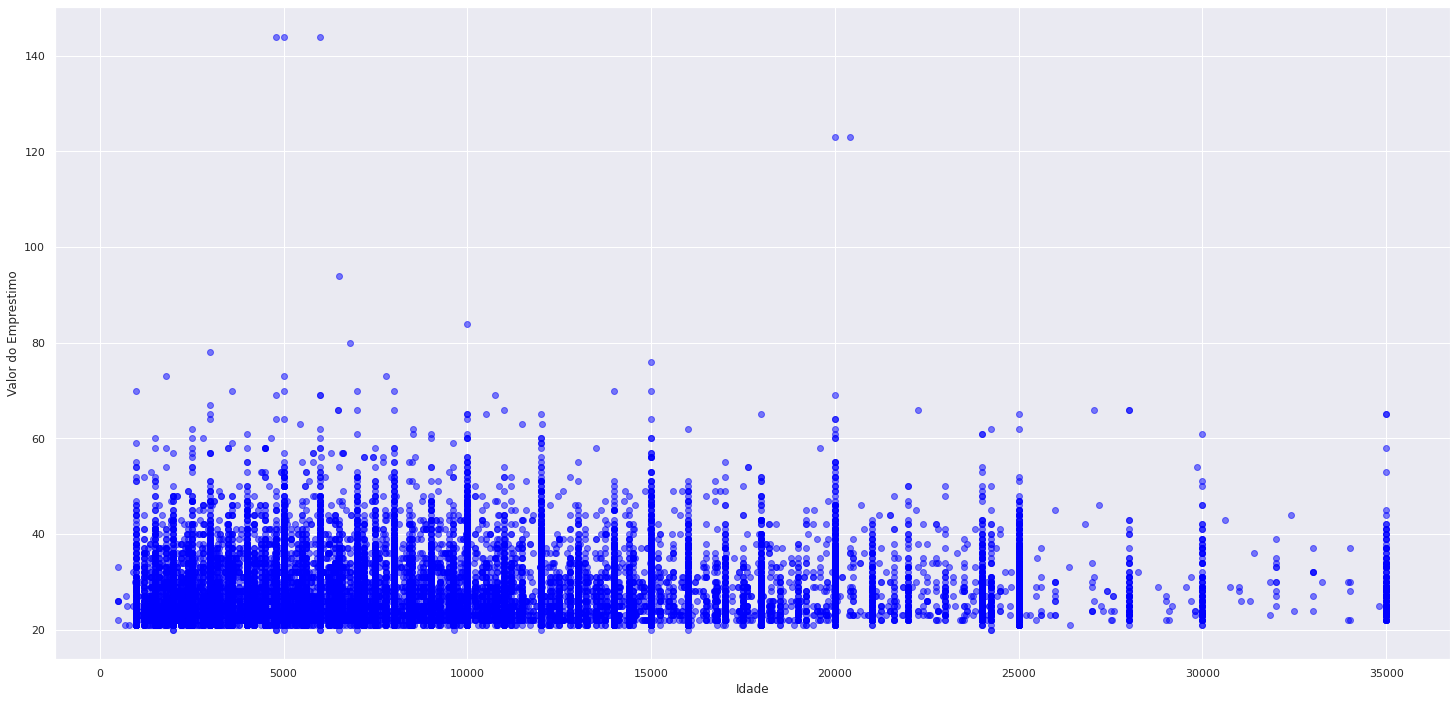

In [98]:
plt.scatter(data['valor_do_emprestimo'], data['idade'], c='blue', alpha=0.5)
plt.xlabel("Idade")
plt.ylabel("Valor do Emprestimo")
plt.show()

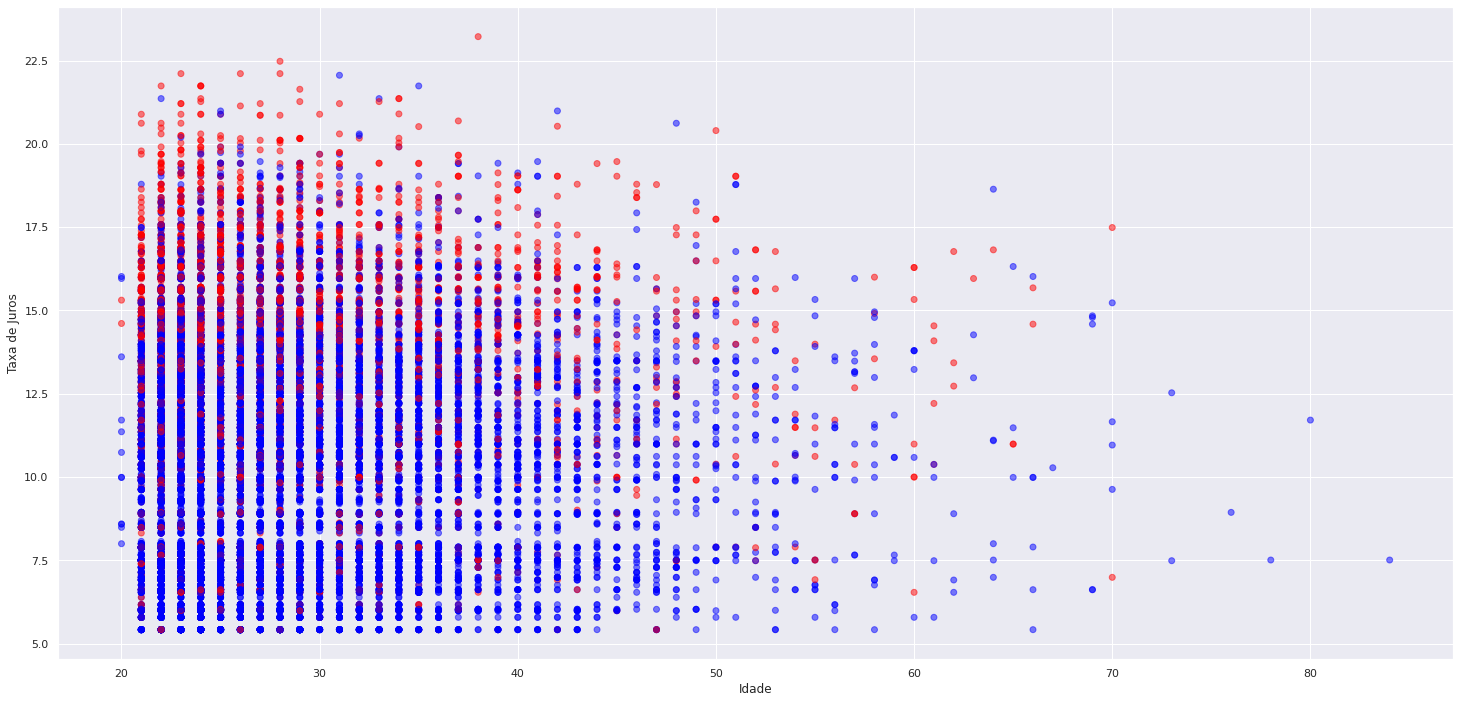

In [99]:
#REMOVENDO OUTLIERS
data = data.drop(data[data['idade'] > 100].index)


colors = ["blue","red"]
plt.scatter(data['idade'], data['taxa_juros'],
            c = data['status_emprestimo'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Idade")
plt.ylabel("Taxa de Juros")
plt.show()

# DATA MISSING

In [100]:
data.isna().sum()

idade                            0
renda_pessoal                    0
estado_casa                      0
duracao_emprego                895
motivo_emprestimo                0
grau_do_emprestimo               0
valor_do_emprestimo              0
taxa_juros                    3115
status_emprestimo                0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## TAXA_JUROS

In [101]:
data['taxa_juros'].fillna((data['taxa_juros'].median()), inplace=True)

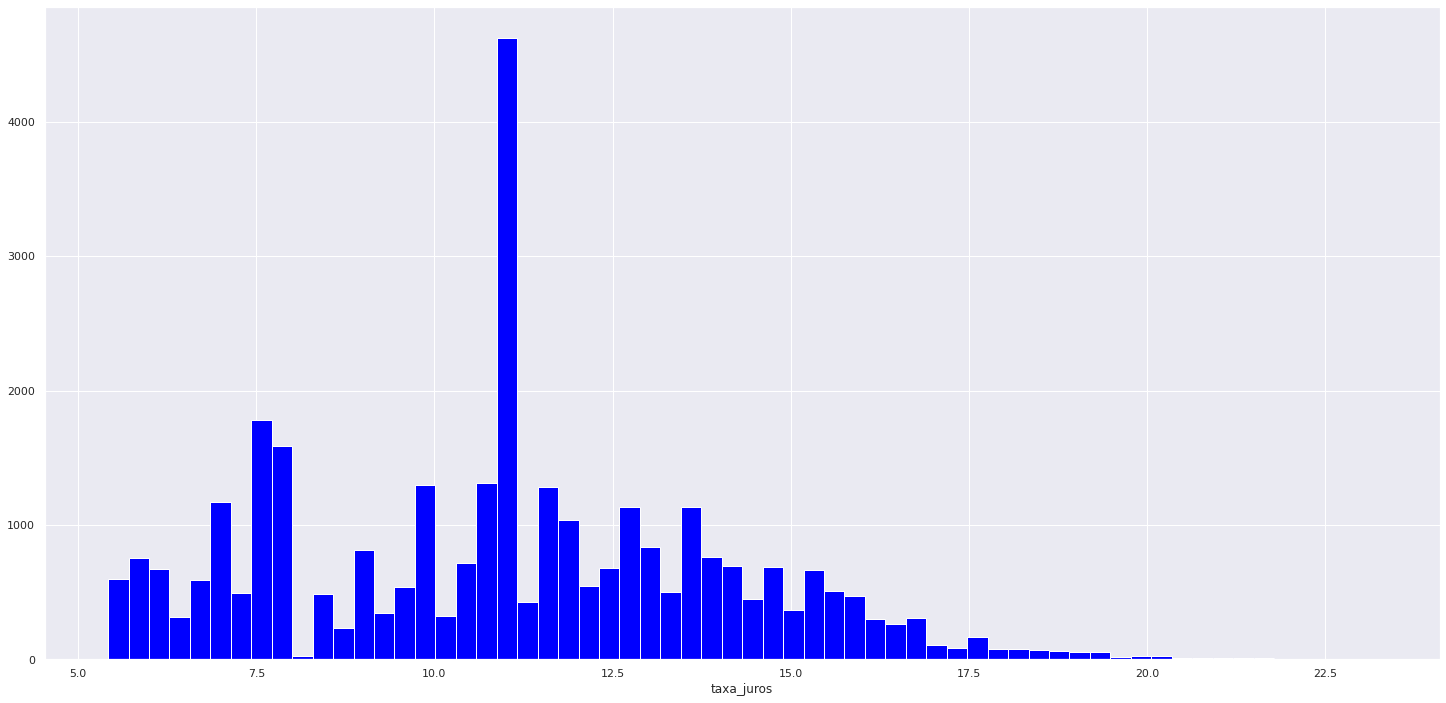

In [102]:
#histograma 
n, bins, patches = plt.hist(data['taxa_juros'], bins='auto', color='blue')
plt.xlabel("taxa_juros")
plt.show()

## DURACAO_EMPREGO

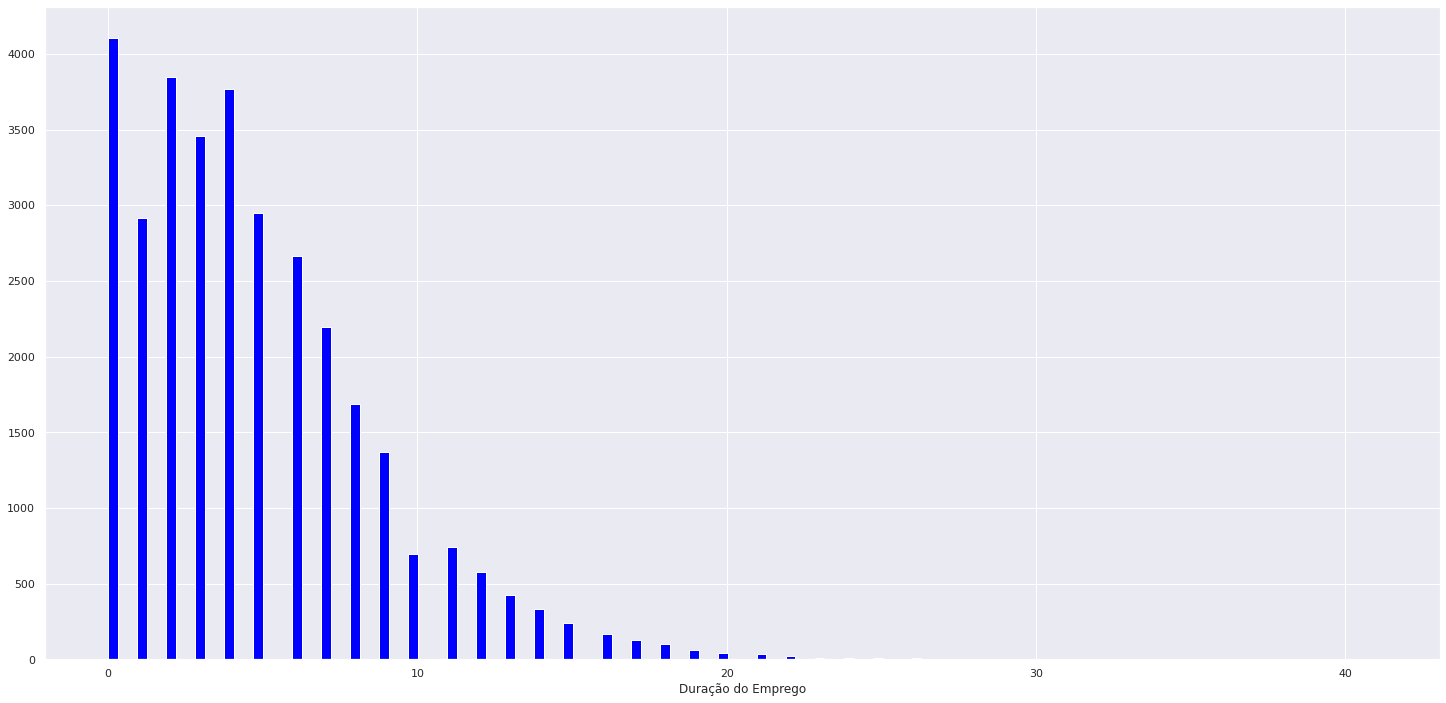

In [103]:
# replace os valores nan pela mediana
data['duracao_emprego'].fillna((data['duracao_emprego'].median()), inplace=True)

#histograma 
n, bins, patches = plt.hist(data['duracao_emprego'], bins='auto', color='blue')
plt.xlabel("Duração do Emprego")
plt.show()

# DATA PREPARATION

## ONE HOT ENCODING

In [104]:
cred_num = data.select_dtypes(exclude=['object'])
cred_cat = data.select_dtypes(include=['object'])

In [105]:
cred_cat_onehot = pd.get_dummies(cred_cat)

In [106]:
data = pd.concat([cred_num, cred_cat_onehot], axis=1)

## SPLIT DATASET INTO TRAIN AND TEST

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = data.drop('status_emprestimo', axis = 1)
y = data[['status_emprestimo']]

In [110]:
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# MODELLING

## LOGISTIC REGRESSION

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
model = LogisticRegression(solver='lbfgs')

In [113]:
model.fit(X_train, np.ravel(Y_train))

LogisticRegression()

In [114]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [115]:
model.intercept_

array([-2.70613608e-09])

In [116]:
model.coef_

array([[-6.52656674e-08, -3.91825218e-05, -2.84856244e-08,
         9.95659965e-05,  7.65281613e-08,  2.35775294e-09,
        -1.13428326e-08, -6.48234278e-09,  5.41019170e-11,
        -4.04835945e-09,  7.77046423e-09,  2.42279475e-09,
        -3.68604229e-09,  1.93374494e-09,  1.56536703e-09,
        -1.22202429e-09, -3.71997622e-09, -1.08090143e-08,
        -5.52809844e-09, -1.46491954e-09,  1.01817384e-08,
         3.38079461e-09,  1.08264485e-09,  4.50718328e-10,
        -9.22335237e-09,  6.51721629e-09]])

For this, you can easily check the .intercept_ of the logistic regression. Remember that this is the y-intercept of the function and the overall log-odds of non-default.

In addition to the intercept_, which is an attribute of the model, LogisticRegression() models also have the .coef_ attribute. This shows how important each training column is for predicting the probability of default.

In [119]:
#fazendo previsão
preds = model.predict_proba(X_test)

#resultado: probabilidade de nao inadiplente e inadiplencia 

In [120]:
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_inadiplencia'])
true_df = y_test.copy()

In [122]:
true_df.head()

,status_emprestimo
1938,0
24939,1
12721,1
24981,1
21956,0


In [123]:
pd.concat([true_df.reset_index(drop=True), preds_df], axis=1)

,status_emprestimo,prob_inadiplencia
0,0,2.938458e-01
1,1,1.696012e-01
2,1,2.219884e-01
3,1,5.684735e-01
4,0,1.290581e-03
5,0,3.334973e-01
6,0,1.697229e-01
7,0,4.291118e-01
8,0,1.865114e-01
9,1,5.388642e-01


# PERFORMANCE

## MODEL ACCURACY SCORING

ACCURACY = NUMEROS DE PREVISOES CORRETAS / NUMERO DE PREVISOES

In [124]:
model.score(X_test, y_test)

0.8018419033000768

## ROC curve charts

Eles traçam a verdadeira taxa positiva, a porcentagem de padrões previstos corretamente, contra a taxa de falsos positivos, a porcentagem de padrões previstos incorretamente

Plots true postive rate (sensitivity) against false positive rate (fall-out)

A linha laranja representa a previsão do modelo e a pontilhada azul representa uma previsão random

Area Under Curve (AUC): area between curve and random prediction, esse é um indicador direto do quão bem o modelo faz previsão

In [142]:
prob_default = preds[:, 1]

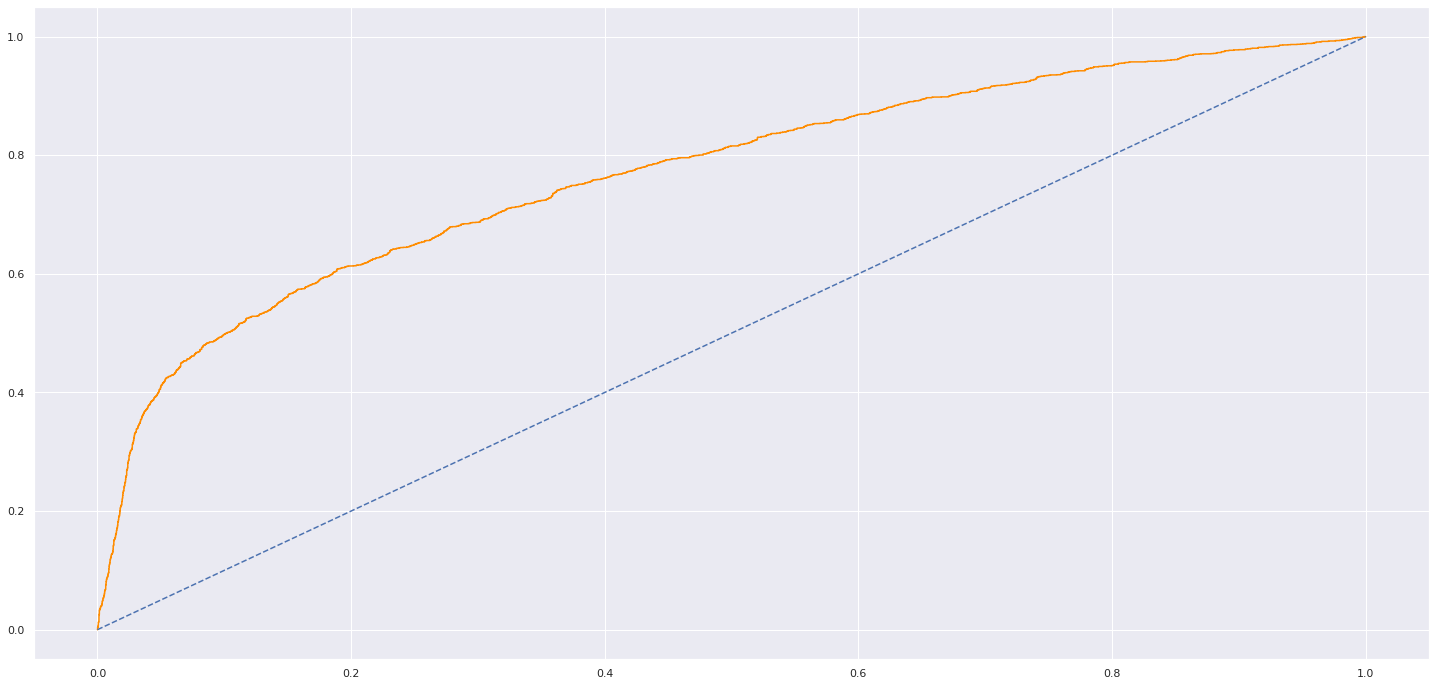

In [144]:
from sklearn.metrics import roc_curve
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0,1], linestyle='--')
plt.show()

In [148]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, prob_default)
auc

0.7702034064463403

## Setting the threshold

In [127]:
preds_df['status_emprestimo'] = preds_df['prob_inadiplencia'].apply(lambda x: 1 if x > 0.5 else 0)

## Credit classification reports

In [131]:
from sklearn.metrics import classification_report

In [137]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['status_emprestimo'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.80      0.99      0.89     10165
     Default       0.76      0.14      0.24      2865

    accuracy                           0.80     13030
   macro avg       0.78      0.57      0.56     13030
weighted avg       0.79      0.80      0.74     13030



## Selecting classification metrics

In [133]:
from sklearn.metrics import precision_recall_fscore_support

In [135]:
precision_recall_fscore_support(y_test, preds_df['status_emprestimo'])[1][1]

0.14415357766143105

In [138]:
preds_df.head()

,prob_inadiplencia,status_emprestimo
0,0.293846,0
1,0.169601,0
2,0.221988,0
3,0.568473,1
4,0.001291,0
